In [4]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import random

In [5]:
label_df=pd.read_csv("D:/vit_vellore/sem2/cifar_dataset/trainLabels.csv")
print(label_df.head())
print(label_df.shape)

   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile
(50000, 2)


In [6]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
train_path="D:/vit_vellore/sem2/cifar_dataset/train"
test_path="D:/vit_vellore/sem2/cifar_dataset/test"

In [8]:
x_list=[] 
y_list=[]
for idx, row in label_df.iterrows():
    address=f"{row['id']}.png"
    label_str=row['label']
    if label_str in classes:
        label_index=classes.index(label_str)
    image_path=os.path.join(train_path, address)
    image=cv2.imread(image_path)
    image=cv2.resize(image, (32,32))
    image=image.astype('float32')/255
    x_list.append(image)
    y_list.append(label_index)

In [9]:
x=np.array(x_list)
y=np.array(y_list)
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [10]:
y_encoded=LabelEncoder().fit_transform(y)
y_hot_encoded=to_categorical(y_encoded, num_classes=10)
print(f"Original Label: {y[0]}")
print(f"Encoded Label: {y_encoded[0]}")
print(f"One-Hot encoded: {y_hot_encoded[0]}")

Original Label: 6
Encoded Label: 6
One-Hot encoded: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
x_train, x_test, y_train, y_test=train_test_split(x, y_hot_encoded, test_size=0.2, random_state=42)
print(f"training size - {len(x_train)} images")
print(f"testing size - {len(x_test)} images")

training size - 40000 images
testing size - 10000 images


In [12]:
model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

c:\Users\Ojas Raverkar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
stopping= EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [15]:
history=model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[stopping])

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3103 - loss: 1.9848 - val_accuracy: 0.4876 - val_loss: 1.4527
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5207 - loss: 1.3441 - val_accuracy: 0.5494 - val_loss: 1.2459
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5676 - loss: 1.2105 - val_accuracy: 0.5949 - val_loss: 1.1455
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6018 - loss: 1.1270 - val_accuracy: 0.5617 - val_loss: 1.2285
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6157 - loss: 1.0788 - val_accuracy: 0.6284 - val_loss: 1.0343
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6365 - loss: 1.0385 - val_accuracy: 0.6597 - val_loss: 0.9695
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6460 - loss: 1.0109 - val_accuracy: 0.6727 - val_loss: 0.9321
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6642 - loss: 0.9654 - val_accu

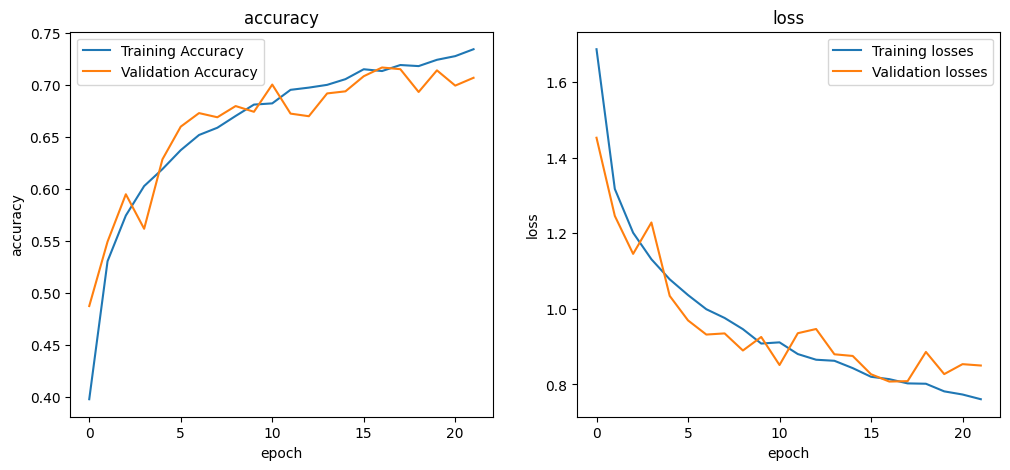

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training losses')
plt.plot(history.history['val_loss'], label='Validation losses')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [18]:
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print(f"Test accuracy is {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7219 - loss: 0.7878
Test accuracy is 72.07%


In [19]:
y_pred=model.predict(x_test)
y_pred_class=np.argmax(y_pred, axis=1)
y_report=np.argmax(y_test, axis=1)
print(classification_report(y_report, y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       973
           1       0.83      0.88      0.85       979
           2       0.65      0.58      0.61      1030
           3       0.60      0.38      0.46      1023
           4       0.63      0.75      0.68       933
           5       0.51      0.73      0.60      1015
           6       0.80      0.80      0.80       996
           7       0.77      0.75      0.76       994
           8       0.86      0.82      0.84      1017
           9       0.88      0.78      0.83      1040

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


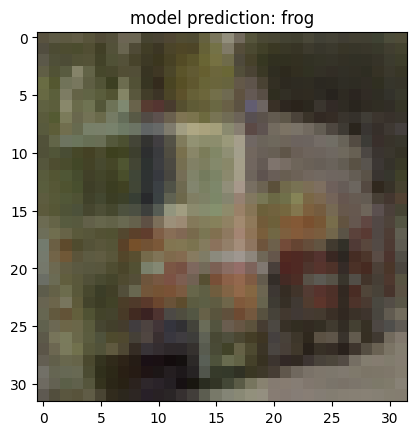

In [26]:
num=random.randint(0,300000)
image1=cv2.imread(f"D:/vit_vellore/sem2/cifar_dataset/test/{num}.png")
image1=cv2.resize(image1, (32,32))
image1=image1.astype("float32")/255.0
image1=np.expand_dims(image1, axis=0)
prediction=model.predict(image1)
final_prediction=np.argmax(prediction)
plt.imshow(cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB))
plt.title(f"model prediction: {classes[final_prediction]}")
plt.show()